# HW_3

In [131]:
from numpy import dot, array, mean, full_like, linspace, random
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import scatter, plot, xlabel, ylabel, title, legend, grid, show

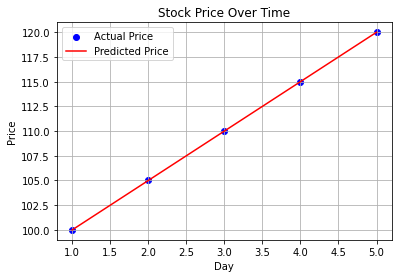

In [132]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді

days = array([1, 2, 3, 4, 5]).reshape(-1, 1) 
prices = array([100, 105, 110, 115, 120])

model = LinearRegression()
model.fit(days, prices)

# Побудова графіка
scatter(days, prices, color='blue', label='Actual Price')  # реальні ціни
plot(days, model.predict(days), color='red', label='Predicted Price')  # передбачені ціни
xlabel('Day')
ylabel('Price')
title('Stock Price Over Time')
legend()
grid(True)
show()

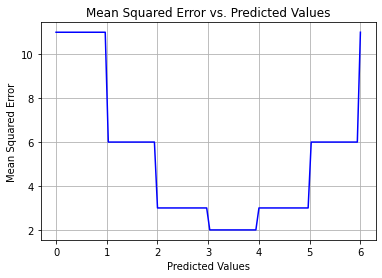

In [133]:
# створіть функцію для обчислення функції втрат у векторному вигляді

def mean_squared_error(y_true, y_pred):
    return mean((y_true - y_pred) ** 2)

y_true = array([1, 2, 3, 4, 5])
y_pred = array([1.5, 2.5, 2.8, 3.7, 4.5])
loss_values = [mean_squared_error(y_true, full_like(y_true, pred)) for pred in linspace(0, 6, 100)]

# Побудова графіка
plot(linspace(0, 6, 100), loss_values, color='blue')
xlabel('Predicted Values')
ylabel('Mean Squared Error')
title('Mean Squared Error vs. Predicted Values')
grid(True)
show()

In [134]:
# реалізуйте один крок градієнтного спуску

def gradient_descent(X, y, w, learning_rate, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        y_pred = dot(X, w)     
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)       
        gradient = -2 * dot(X.T, (y - y_pred)) / len(y)
        w -= learning_rate * gradient
    
    return w, losses

Оптимальні параметри w: [19.47362016 38.80768835 25.75820501]


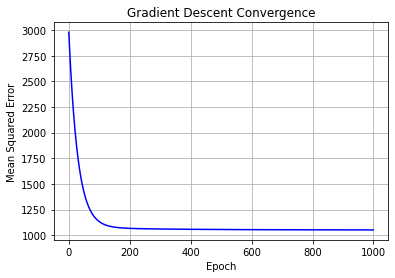

In [135]:
# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

# Генерація випадкових даних (це приклад, замість цього використовуйте свій датасет)
random.seed(0)
X = random.rand(100, 3)  # 100 прикладів з трьома ознаками (площа, кількість ванних кімнат, кількість спалень)
y = random.rand(100) * 100  # Ціни на будинки

w = random.rand(3)  # Початкові випадкові значення параметрів
learning_rate = 0.01
num_epochs = 1000

# Градієнтний спуск
optimal_w_gd, losses_gd = gradient_descent(X, y, w, learning_rate, num_epochs)

plot(range(num_epochs), losses_gd, color='blue')
xlabel('Epoch')
ylabel('Mean Squared Error')
title('Gradient Descent Convergence')
grid(True)
show()

print("Оптимальні параметри w:", optimal_w_gd)

In [136]:
# знайдіть ці ж параметри за допомогою аналітичного рішення

def gradient_descent_chain_rule(X, y, w, learning_rate, num_epochs):
    losses = []
    m = len(y)  # Кількість прикладів
    for epoch in range(num_epochs):
        y_pred = dot(X, w)       
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)     
        gradient = (1 / m) * dot(X.T, (y_pred - y)) 
        w -= learning_rate * gradient
    
    return w, losses

Оптимальні параметри w: [22.09963113 35.43112139 26.28402922]


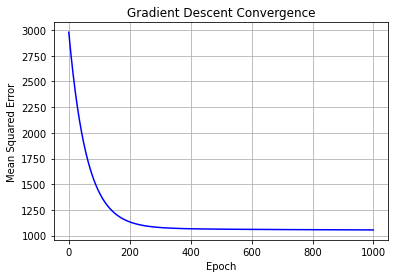

In [137]:
# Генерація випадкових даних (це приклад, замість цього використовуйте свій датасет)
random.seed(0)
X = random.rand(100, 3)  # 100 прикладів з трьома ознаками (площа, кількість ванних кімнат, кількість спалень)
y = random.rand(100) * 100  # Ціни на будинки

w = random.rand(3)  # Початкові випадкові значення параметрів
learning_rate = 0.01
num_epochs = 1000

# Градієнтний спуск
optimal_w_gd_cr, losses_gd_cr = gradient_descent_chain_rule(X, y, w, learning_rate, num_epochs)

plot(range(num_epochs), losses_gd_cr, color='blue')
xlabel('Epoch')
ylabel('Mean Squared Error')
title('Gradient Descent Convergence')
grid(True)
show()

print("Оптимальні параметри w:", optimal_w_gd_cr)

Оптимальні параметри w (Gradient Descent): [19.47362016 38.80768835 25.75820501]
Оптимальні параметри w (Gradient Descent Chain Rule): [22.09963113 35.43112139 26.28402922]


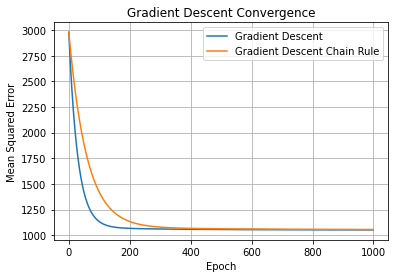

In [138]:
# Порівняння результатів

plot(range(num_epochs), losses_gd, label='Gradient Descent')
plot(range(num_epochs), losses_gd_cr, label='Gradient Descent Chain Rule')
xlabel('Epoch')
ylabel('Mean Squared Error')
title('Gradient Descent Convergence')
legend()
grid(True)
show()

print("Оптимальні параметри w (Gradient Descent):", optimal_w_gd)
print("Оптимальні параметри w (Gradient Descent Chain Rule):", optimal_w_gd_cr)